In [75]:
import pandas as pd
import numpy as np

# Project introduction

For our machine learning project, we want to try and predict a Airbnb's avaliability for a given month using listing data.

# Data Preperation

## Data cleaning

In [76]:
# generate two data frames containing all of the listing and calendar data for each location
import os
import pandas as pd

directory_path = 'home_rentals/'

# Initialize an empty list to store DataFrames
listing_df = []
calendar_df = []

# Iterate through subdirectories
for subdirectory in os.listdir(directory_path):
    subdirectory_path = os.path.join(directory_path, subdirectory) 

    csv_listing_file_path = os.path.join(subdirectory_path, "listings.csv.gz")
    csv_calendar_file_path = os.path.join(subdirectory_path, "calendar.csv.gz")
    print(csv_listing_file_path)
    print(csv_calendar_file_path)

    df1 = pd.read_csv(csv_listing_file_path)
    df2 = pd.read_csv(csv_calendar_file_path)

    df1['location'] = subdirectory
    df2['location'] = subdirectory

    listing_df.append(df1)
    calendar_df.append(df2)


# Concatenate all DataFrames into a single DataFrame
all_listing_df = pd.concat(listing_df, ignore_index=True)
all_calendar_df = pd.concat(calendar_df, ignore_index=True)

home_rentals/Amsterdam\listings.csv.gz
home_rentals/Amsterdam\calendar.csv.gz
home_rentals/Barcelona\listings.csv.gz
home_rentals/Barcelona\calendar.csv.gz
home_rentals/Euskadi\listings.csv.gz
home_rentals/Euskadi\calendar.csv.gz
home_rentals/Geneva\listings.csv.gz
home_rentals/Geneva\calendar.csv.gz
home_rentals/Ireland\listings.csv.gz
home_rentals/Ireland\calendar.csv.gz
home_rentals/Lisbon\listings.csv.gz
home_rentals/Lisbon\calendar.csv.gz
home_rentals/Los Angeles\listings.csv.gz
home_rentals/Los Angeles\calendar.csv.gz
home_rentals/Madrid\listings.csv.gz
home_rentals/Madrid\calendar.csv.gz
home_rentals/Malaga\listings.csv.gz
home_rentals/Malaga\calendar.csv.gz
home_rentals/Mallorca\listings.csv.gz
home_rentals/Mallorca\calendar.csv.gz
home_rentals/Malta\listings.csv.gz
home_rentals/Malta\calendar.csv.gz
home_rentals/Menorca\listings.csv.gz
home_rentals/Menorca\calendar.csv.gz
home_rentals/Mexico City\listings.csv.gz
home_rentals/Mexico City\calendar.csv.gz
home_rentals/Milan\listi

In [77]:
all_calendar_df

listing_id        date available    price adjusted_price  \
0                2818  2022-09-07         f   $49.00         $49.00   
1                2818  2022-09-08         f   $49.00         $49.00   
2                2818  2022-09-09         f   $49.00         $49.00   
3                2818  2022-09-10         f   $49.00         $49.00   
4                2818  2022-09-11         f   $49.00         $49.00   
...               ...         ...       ...      ...            ...   
124889345     2869130  2023-09-18         t  $575.00        $575.00   
124889346     2869130  2023-09-19         t  $575.00        $575.00   
124889347     2869130  2023-09-20         t  $575.00        $575.00   
124889348     2869130  2023-09-21         t  $575.00        $575.00   
124889349     2869130  2023-09-22         t  $575.00        $575.00   

           minimum_nights  maximum_nights   location  
0                     3.0          1125.0  Amsterdam  
1                     3.0          1125.0  Amsterdam  
2                     3.0          1125.0  Amsterdam  
3                     3.0          1125.0  Amsterdam  
4                     3.0          1125.0  Amsterdam  
...                   ...             ...        ...  
124889345            27.0            57.0     Zurich  
124889346            27.0            57.0     Zurich  
124889347            27.0            57.0     Zurich  
124889348            27.0            57.0     Zurich  
124889349            27.0            57.0     Zurich  

[124889350 rows x 8 columns]

In [78]:
all_listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [161]:
############### Q1 ###############
 

valenciadf = all_listing_df[all_listing_df["location"]=="Valencia"]
valenciadf['room_type'].value_counts()

# order of decreasing frequency: Entire home/apt, Private room, Shared room

room_type
Entire home/apt    5176
Private room       2130
Shared room          33
Hotel room           16
Name: count, dtype: int64

In [211]:
############### Q2 ###############

madriddf = all_listing_df[all_listing_df["location"] == "Madrid"]

# Clean and convert the "price" column to numeric
madriddf['price'] = pd.to_numeric(madriddf['price'].str.replace('[^\d.]', '', regex=True), errors='coerce')

# Remove rows with missing ID values and prices
madriddf = madriddf.dropna(subset=['scrape_id', 'price'])

# Calculate the average price for each neighborhood
average_prices = madriddf.groupby('neighbourhood_group_cleansed')['price'].mean().reset_index()

# Print or use the resulting DataFrame
average_prices


# max value: 313.706 --> San Blas - Canillejas

#min value: 63.537 --> Villaverde



C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\1140071845.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madriddf['price'] = pd.to_numeric(madriddf['price'].str.replace('[^\d.]', '', regex=True), errors='coerce')


neighbourhood_group_cleansed       price
0                    Arganzuela  143.913364
1                       Barajas  121.748344
2                   Carabanchel   82.549861
3                        Centro  136.030825
4                     Chamartín  126.226027
5                      Chamberí  144.613410
6                 Ciudad Lineal  111.270998
7         Fuencarral - El Pardo  133.193989
8                     Hortaleza  137.014778
9                        Latina  133.088083
10            Moncloa - Aravaca  203.163717
11                    Moratalaz   85.116788
12           Puente de Vallecas   80.326786
13                       Retiro  125.815534
14                    Salamanca  174.543897
15        San Blas - Canillejas  313.706009
16                       Tetuán  113.390608
17                        Usera   71.257310
18                    Vicálvaro  186.355556
19            Villa de Vallecas   72.125000
20                   Villaverde   63.537190

In [221]:
############### Q3 ##############

cities = ["Malaga", "Barcelona", "Mallorca", "Valencia"]

superhost_count = [0, 0, 0, 0]

malagadf = all_listing_df[all_listing_df["location"]==cities[0]]
barcelonadf = all_listing_df[all_listing_df["location"]==cities[1]]
mallorcadf = all_listing_df[all_listing_df["location"]==cities[2]]
valenciadf = all_listing_df[all_listing_df["location"]==cities[3]]

superhost_count[0] = malagadf["host_is_superhost"].value_counts()['t']
superhost_count[1] = barcelonadf["host_is_superhost"].value_counts()['t']
superhost_count[2] = mallorcadf["host_is_superhost"].value_counts()['t']
superhost_count[3] = valenciadf["host_is_superhost"].value_counts()['t']

superhost_count

# smallest value is at index 3, aka in Valencia!


[1845, 2804, 3243, 1523]

In [225]:
############### Q4 ##############

romedf = all_listing_df[all_listing_df["location"]=='Rome']

# fix the price column
romedf['price'] = pd.to_numeric(romedf['price'].str.replace('[^\d.]', '', regex=True), errors='coerce')

# calculate average price
romedf['price'].mean()

# average price is 172.56, thus it is >160 and <200 


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\802765646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  romedf['price'] = pd.to_numeric(romedf['price'].str.replace('[^\d.]', '', regex=True), errors='coerce')


172.56255709789363

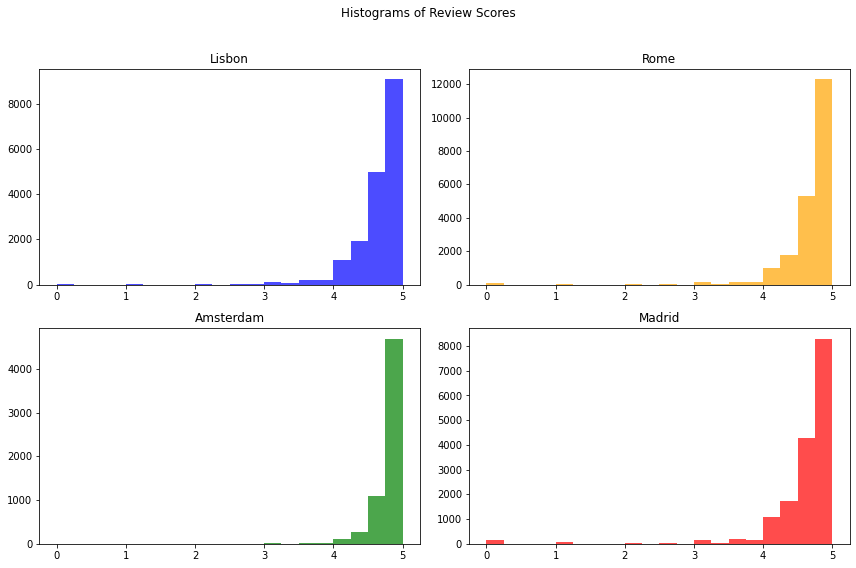

In [226]:
############### Q6 ##############

lisbondf = all_listing_df[all_listing_df["location"]=='Lisbon']
romedf = all_listing_df[all_listing_df["location"]=='Rome']
amsterdamdf = all_listing_df[all_listing_df["location"]=='Amsterdam']
madriddf = all_listing_df[all_listing_df["location"]=='Madrid']

lisbon_scores = lisbondf["review_scores_rating"]
rome_scores = romedf['review_scores_rating']
amsterdam_scores = amsterdamdf['review_scores_rating']
madrid_scores = madriddf['review_scores_rating']


import matplotlib.pyplot as plt
# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Histograms of Review Scores')

# Plot histograms
axs[0, 0].hist(lisbon_scores, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Lisbon')

axs[0, 1].hist(rome_scores, bins=20, color='orange', alpha=0.7)
axs[0, 1].set_title('Rome')

axs[1, 0].hist(amsterdam_scores, bins=20, color='green', alpha=0.7)
axs[1, 0].set_title('Amsterdam')

axs[1, 1].hist(madrid_scores, bins=20, color='red', alpha=0.7)
axs[1, 1].set_title('Madrid')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [240]:
############### Q7 ##############

sanfrandf = all_listing_df[all_listing_df["location"]=='San Francisco']

michaeldata = sanfrandf[sanfrandf['host_name'] == 'Michael']
samueldata = sanfrandf[sanfrandf['host_name'] == 'Samuel']
sudata = sanfrandf[sanfrandf['host_name'] == 'Su']
landmarkdata = sanfrandf[sanfrandf['host_name'] == 'Landmark']

michaelreviews = michaeldata['number_of_reviews'].sum()
samuelreviews = samueldata['number_of_reviews'].sum()
sureviews = sudata['number_of_reviews'].sum()
landmarkreviews = landmarkdata['number_of_reviews'].sum()

print(f"Michael: {michaelreviews} \n Samuel: {samuelreviews} \n Su: {sureviews} \n Landmark: {landmarkreviews}")

# --> Michael has the most reviews in San Francisco!

Michael: 3769.0 
 Samuel: 0.0 
 Su: 1832.0 
 Landmark: 289.0


### Removing Irrelevant columns 

Since this dataset has a lot of variables, we can start by removing colums that will be clearly irrelevant for our research question such as the following:

- *'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_id', 'host_thumbnail_url', host_url', 'host_name'*  = Identifier variables
-  *'name', 'description', 'neighborhood_overview', 'host_about', 'bathrooms_text'*  = We will not be working with textual data for this analysis, for the sake of efficiency and time
- *'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude','longitude', region_name', 'region_parent_id', 'region_parent_name','region_parent_parent_id', 'region_parent_parent_name'* = We will only be using Country in our analysis as a geographic identifier, in order to reduce the dimension of our data while keeping some identifiabiltiy (since there are 20 countries)
- *'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365'* = These are variables that will be dependant on our predictor variable in this analysis 

In [79]:
columns_drop = ['scrape_id', 'last_scraped', 'source', 'picture_url', 'host_id', 'host_thumbnail_url', 'host_url','name', 
                    'description', 'neighborhood_overview', 'host_about', 'bathrooms_text', 'neighbourhood',
                      'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude','longitude',
                    'region_name', 'region_parent_id', 'region_parent_name','region_parent_parent_id', 'region_parent_parent_name',
                      'has_availability', 'availability_60', 'availability_90', 'amenities',
                      
                      'host_id','host_url', 'host_name', 'host_since', 'host_location', 'host_about',
                      'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                      'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
                      'host_neighbourhood', 'host_listings_count',
                      'host_total_listings_count', 'host_verifications',
                      'host_has_profile_pic', 'host_identity_verified', 'calculated_host_listings_count',
                      'calculated_host_listings_count_entire_homes',
                      'calculated_host_listings_count_private_rooms',
                      'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'listing_url',
                       'minimum_minimum_nights', 'maximum_minimum_nights',
                      'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
                      'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
                      'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                      'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'requires_license', 
                      'instant_bookable', 'last_searched', 'region_id', 'listings.csv', 'beds', 'bedrooms']

all_listing_df_1 = all_listing_df.drop(columns=columns_drop) 

### Creating columns for amenities

In [80]:
'''
# clean out all of the rows that have NaN in the amenities column


# Check for NaN values in the "amenities" column
nan_rows = all_listing_df_1[all_listing_df_1['amenities'].isna()]


# Remove rows with NaN values in the "amenities" column
all_listing_df_1_cleaned = all_listing_df_1.dropna(subset=['amenities'])
'''

'\n# clean out all of the rows that have NaN in the amenities column\n\n\n# Check for NaN values in the "amenities" column\nnan_rows = all_listing_df_1[all_listing_df_1[\'amenities\'].isna()]\n\n\n# Remove rows with NaN values in the "amenities" column\nall_listing_df_1_cleaned = all_listing_df_1.dropna(subset=[\'amenities\'])\n'

In [81]:
'''
import numpy as np 

# Check for NaN values in the "amenities" column
nan_rows = all_listing_df_1[all_listing_df_1['amenities'].isna()]

# Remove rows with NaN values in the "amenities" column
all_listing_df_1_cleaned = all_listing_df_1.dropna(subset=['amenities'])

# since "amenities" contains a list with all of the amenities, we have to first extract these
# Create a new DataFrame by repeating rows based on the number of elements in each "amenities" list
df_repeated = pd.DataFrame({
    'id': all_listing_df_1_cleaned['id'].repeat(all_listing_df_1_cleaned['amenities'].apply(len)),
    'amenities': [item for sublist in all_listing_df_1_cleaned['amenities'] for item in sublist]
})

# Join the strings in the 'amenities' column by using ', '.join
df_repeated['amenities'] = df_repeated['amenities'].apply(', '.join)


# make an array of zeroes in which to put the frequency each amenity appears in the listings
#amenities_count = np.zeros_like(unique_amenities)

#for amenity in unique_amenities:
all_listing_df_1_cleaned
'''


'\nimport numpy as np \n\n# Check for NaN values in the "amenities" column\nnan_rows = all_listing_df_1[all_listing_df_1[\'amenities\'].isna()]\n\n# Remove rows with NaN values in the "amenities" column\nall_listing_df_1_cleaned = all_listing_df_1.dropna(subset=[\'amenities\'])\n\n# since "amenities" contains a list with all of the amenities, we have to first extract these\n# Create a new DataFrame by repeating rows based on the number of elements in each "amenities" list\ndf_repeated = pd.DataFrame({\n    \'id\': all_listing_df_1_cleaned[\'id\'].repeat(all_listing_df_1_cleaned[\'amenities\'].apply(len)),\n    \'amenities\': [item for sublist in all_listing_df_1_cleaned[\'amenities\'] for item in sublist]\n})\n\n# Join the strings in the \'amenities\' column by using \', \'.join\ndf_repeated[\'amenities\'] = df_repeated[\'amenities\'].apply(\', \'.join)\n\n\n# make an array of zeroes in which to put the frequency each amenity appears in the listings\n#amenities_count = np.zeros_like(un

In [82]:
""""
# Extract amenities from the JSON array and create dummy columns
df_amenities = all_listing_df_1['amenities'].str.strip('[]').str.replace('"', '').str.get_dummies(', ')

# Add a prefix to the dummy columns
df_amenities = df_amenities.add_prefix('amenity_')

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([all_listing_df_1, df_amenities], axis=1)

# Drop the original 'amenities' column if you want
df = df.drop('amenities', axis=1)

# Display the resulting DataFrame

""" 


'"\n# Extract amenities from the JSON array and create dummy columns\ndf_amenities = all_listing_df_1[\'amenities\'].str.strip(\'[]\').str.replace(\'"\', \'\').str.get_dummies(\', \')\n\n# Add a prefix to the dummy columns\ndf_amenities = df_amenities.add_prefix(\'amenity_\')\n\n# Concatenate the dummy columns with the original DataFrame\ndf = pd.concat([all_listing_df_1, df_amenities], axis=1)\n\n# Drop the original \'amenities\' column if you want\ndf = df.drop(\'amenities\', axis=1)\n\n# Display the resulting DataFrame\n\n'

In [83]:

#all_listing_df_1['amenities'].unique()





In [84]:
'''
import ast


# Assuming your DataFrame is named 'df' and the column is named 'amenities'
# If the amenities column is not already a list, convert it using ast.literal_eval
all_listing_df_1['amenities'] = all_listing_df_1['amenities'].apply(ast.literal_eval)

# Initialize an empty set to store unique amenities
unique_amenities = set()

# Iterate through each row in the DataFrame
for index, row in all_listing_df_1.iterrows():
    # Get the amenities for the current row
    amenities_list = row['amenities']

    # Update the set with the unique amenities for this row
    unique_amenities.update(amenities_list)

# Convert the set back to a list
unique_amenities_list = list(unique_amenities)

# Print the unique amenities list
print(unique_amenities_list)

'''

"\nimport ast\n\n\n# Assuming your DataFrame is named 'df' and the column is named 'amenities'\n# If the amenities column is not already a list, convert it using ast.literal_eval\nall_listing_df_1['amenities'] = all_listing_df_1['amenities'].apply(ast.literal_eval)\n\n# Initialize an empty set to store unique amenities\nunique_amenities = set()\n\n# Iterate through each row in the DataFrame\nfor index, row in all_listing_df_1.iterrows():\n    # Get the amenities for the current row\n    amenities_list = row['amenities']\n\n    # Update the set with the unique amenities for this row\n    unique_amenities.update(amenities_list)\n\n# Convert the set back to a list\nunique_amenities_list = list(unique_amenities)\n\n# Print the unique amenities list\nprint(unique_amenities_list)\n\n"

### Remove rows and columns that have significant amount of NAN values 
 

In [85]:
import pandas as pd
import json

# Use json_normalize to flatten the JSON column
normalized_df = pd.json_normalize(all_listing_df_1_cleaned['amenities'])

# Concatenate the new DataFrame with the original DataFrame
result_df = pd.concat([all_listing_df_1_cleaned, normalized_df], axis=1)

# Drop the original 'amenities' column if needed
#result_df = result_df.drop('amenities', axis=1)




result_df

id                property_type        room_type  \
0       2.818000e+03  Private room in rental unit     Private room   
1       2.016800e+04    Private room in townhouse     Private room   
2       2.788600e+04    Private room in houseboat     Private room   
3       2.887100e+04  Private room in rental unit     Private room   
4       2.905100e+04  Private room in rental unit     Private room   
...              ...                          ...              ...   
342232  5.721959e+17    Entire serviced apartment  Entire home/apt   
342233  4.607863e+07                Room in hotel     Private room   
342234  4.647998e+07                Room in hotel     Private room   
342235  4.672216e+07                Room in hotel     Private room   
145527           NaN                          NaN              NaN   

        accommodates  bathrooms  \
0                2.0        NaN   
1                2.0        NaN   
2                2.0        NaN   
3                2.0        NaN   
4                1.0        NaN   
...              ...        ...   
342232           6.0        NaN   
342233           6.0        NaN   
342234           2.0        NaN   
342235           2.0        NaN   
145527           NaN        NaN   

                                                amenities    price  \
0       ["Fire extinguisher", "Private entrance", "Lau...   $49.00   
1       ["Wifi", "Refrigerator", "TV", "Fire extinguis...  $106.00   
2       ["Safe", "Fire extinguisher", "Hp neutral, eco...  $136.00   
3       ["Wifi", "Shampoo", "Refrigerator", "Iron", "F...   $75.00   
4       ["Wifi", "Shampoo", "Refrigerator", "Iron", "F...   $55.00   
...                                                   ...      ...   
342232  ["65\" HDTV with standard cable", "Essentials"...  $350.00   
342233  ["Essentials", "Wifi", "Long term stays allowe...  $285.00   
342234  ["Children\u2019s books and toys", "Essentials...  $105.00   
342235  ["Essentials", "Wifi", "Long term stays allowe...  $155.00   
145527                                                NaN      NaN   

        minimum_nights  maximum_nights  calendar_updated  availability_30  \
0                  3.0            28.0               NaN              1.0   
1                  1.0           365.0               NaN              0.0   
2                  2.0           356.0               NaN              0.0   
3                  2.0          1825.0               NaN              4.0   
4                  2.0           730.0               NaN              0.0   
...                ...             ...               ...              ...   
342232             3.0            90.0               NaN              0.0   
342233             1.0          1125.0               NaN              0.0   
342234             9.0          1125.0               NaN              0.0   
342235            10.0          1125.0               NaN              0.0   
145527             NaN             NaN               NaN              NaN   

        availability_365   location  
0                   14.0  Amsterdam  
1                    0.0  Amsterdam  
2                  121.0  Amsterdam  
3                  117.0  Amsterdam  
4                  160.0  Amsterdam  
...                  ...        ...  
342232               0.0     Zurich  
342233               0.0     Zurich  
342234               0.0     Zurich  
342235               0.0     Zurich  
145527               NaN        NaN  

[342236 rows x 13 columns]

In [86]:
""""
# Extract amenities from the JSON array and create dummy columns
df_amenities = all_listing_df_1['amenities'].str.strip('[]').str.replace('"', '').str.get_dummies(', ')

# Add a prefix to the dummy columns
df_amenities = df_amenities.add_prefix('amenity_')

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([all_listing_df_1, df_amenities], axis=1)

# Drop the original 'amenities' column if you want
df = df.drop('amenities', axis=1)

# Display the resulting DataFrame

""" 


'"\n# Extract amenities from the JSON array and create dummy columns\ndf_amenities = all_listing_df_1[\'amenities\'].str.strip(\'[]\').str.replace(\'"\', \'\').str.get_dummies(\', \')\n\n# Add a prefix to the dummy columns\ndf_amenities = df_amenities.add_prefix(\'amenity_\')\n\n# Concatenate the dummy columns with the original DataFrame\ndf = pd.concat([all_listing_df_1, df_amenities], axis=1)\n\n# Drop the original \'amenities\' column if you want\ndf = df.drop(\'amenities\', axis=1)\n\n# Display the resulting DataFrame\n\n'

### Remove rows and columns that have significant amount of NAN values 
 

In [87]:
all_listing_df_1 


id                property_type        room_type  \
0       2.818000e+03  Private room in rental unit     Private room   
1       2.016800e+04    Private room in townhouse     Private room   
2       2.788600e+04    Private room in houseboat     Private room   
3       2.887100e+04  Private room in rental unit     Private room   
4       2.905100e+04  Private room in rental unit     Private room   
...              ...                          ...              ...   
342231  5.295024e+07           Entire rental unit  Entire home/apt   
342232  5.721959e+17    Entire serviced apartment  Entire home/apt   
342233  4.607863e+07                Room in hotel     Private room   
342234  4.647998e+07                Room in hotel     Private room   
342235  4.672216e+07                Room in hotel     Private room   

        accommodates  bathrooms    price  minimum_nights  maximum_nights  \
0                2.0        NaN   $49.00             3.0            28.0   
1                2.0        NaN  $106.00             1.0           365.0   
2                2.0        NaN  $136.00             2.0           356.0   
3                2.0        NaN   $75.00             2.0          1825.0   
4                1.0        NaN   $55.00             2.0           730.0   
...              ...        ...      ...             ...             ...   
342231           4.0        NaN  $156.00             6.0          1125.0   
342232           6.0        NaN  $350.00             3.0            90.0   
342233           6.0        NaN  $285.00             1.0          1125.0   
342234           2.0        NaN  $105.00             9.0          1125.0   
342235           2.0        NaN  $155.00            10.0          1125.0   

        calendar_updated  availability_30  availability_365   location  
0                    NaN              1.0              14.0  Amsterdam  
1                    NaN              0.0               0.0  Amsterdam  
2                    NaN              0.0             121.0  Amsterdam  
3                    NaN              4.0             117.0  Amsterdam  
4                    NaN              0.0             160.0  Amsterdam  
...                  ...              ...               ...        ...  
342231               NaN              1.0               1.0     Zurich  
342232               NaN              0.0               0.0     Zurich  
342233               NaN              0.0               0.0     Zurich  
342234               NaN              0.0               0.0     Zurich  
342235               NaN              0.0               0.0     Zurich  

[342236 rows x 12 columns]

In [88]:
#remove all columnns with more than 50% of NaN values 
all_listing_df_2 = all_listing_df_1.dropna(thresh=0.5*len(all_listing_df_1), axis=1)
all_listing_df_2

id                property_type        room_type  \
0       2.818000e+03  Private room in rental unit     Private room   
1       2.016800e+04    Private room in townhouse     Private room   
2       2.788600e+04    Private room in houseboat     Private room   
3       2.887100e+04  Private room in rental unit     Private room   
4       2.905100e+04  Private room in rental unit     Private room   
...              ...                          ...              ...   
342231  5.295024e+07           Entire rental unit  Entire home/apt   
342232  5.721959e+17    Entire serviced apartment  Entire home/apt   
342233  4.607863e+07                Room in hotel     Private room   
342234  4.647998e+07                Room in hotel     Private room   
342235  4.672216e+07                Room in hotel     Private room   

        accommodates    price  minimum_nights  maximum_nights  \
0                2.0   $49.00             3.0            28.0   
1                2.0  $106.00             1.0           365.0   
2                2.0  $136.00             2.0           356.0   
3                2.0   $75.00             2.0          1825.0   
4                1.0   $55.00             2.0           730.0   
...              ...      ...             ...             ...   
342231           4.0  $156.00             6.0          1125.0   
342232           6.0  $350.00             3.0            90.0   
342233           6.0  $285.00             1.0          1125.0   
342234           2.0  $105.00             9.0          1125.0   
342235           2.0  $155.00            10.0          1125.0   

        availability_30  availability_365   location  
0                   1.0              14.0  Amsterdam  
1                   0.0               0.0  Amsterdam  
2                   0.0             121.0  Amsterdam  
3                   4.0             117.0  Amsterdam  
4                   0.0             160.0  Amsterdam  
...                 ...               ...        ...  
342231              1.0               1.0     Zurich  
342232              0.0               0.0     Zurich  
342233              0.0               0.0     Zurich  
342234              0.0               0.0     Zurich  
342235              0.0               0.0     Zurich  

[342236 rows x 10 columns]

In [89]:
removed_columns=[col for col in all_listing_df_1 if col not in all_listing_df_2]

print(f'the columns removed are {removed_columns}')

the columns removed are ['bathrooms', 'calendar_updated']


In [90]:
#After removing all the columns with more than 50% of NaN values we are now going to look at rows and remove those too
threshold = 0.70 
all_listing_df_3 = all_listing_df_2.dropna(thresh=float(threshold * len(all_listing_df_2.columns)))
removed_rows = len(all_listing_df_2) - len(all_listing_df_3)
print(f'num of removed rows is {removed_rows}')

all_listing_df_3

num of removed rows is 1


id                property_type        room_type  \
0       2.818000e+03  Private room in rental unit     Private room   
1       2.016800e+04    Private room in townhouse     Private room   
2       2.788600e+04    Private room in houseboat     Private room   
3       2.887100e+04  Private room in rental unit     Private room   
4       2.905100e+04  Private room in rental unit     Private room   
...              ...                          ...              ...   
342231  5.295024e+07           Entire rental unit  Entire home/apt   
342232  5.721959e+17    Entire serviced apartment  Entire home/apt   
342233  4.607863e+07                Room in hotel     Private room   
342234  4.647998e+07                Room in hotel     Private room   
342235  4.672216e+07                Room in hotel     Private room   

        accommodates    price  minimum_nights  maximum_nights  \
0                2.0   $49.00             3.0            28.0   
1                2.0  $106.00             1.0           365.0   
2                2.0  $136.00             2.0           356.0   
3                2.0   $75.00             2.0          1825.0   
4                1.0   $55.00             2.0           730.0   
...              ...      ...             ...             ...   
342231           4.0  $156.00             6.0          1125.0   
342232           6.0  $350.00             3.0            90.0   
342233           6.0  $285.00             1.0          1125.0   
342234           2.0  $105.00             9.0          1125.0   
342235           2.0  $155.00            10.0          1125.0   

        availability_30  availability_365   location  
0                   1.0              14.0  Amsterdam  
1                   0.0               0.0  Amsterdam  
2                   0.0             121.0  Amsterdam  
3                   4.0             117.0  Amsterdam  
4                   0.0             160.0  Amsterdam  
...                 ...               ...        ...  
342231              1.0               1.0     Zurich  
342232              0.0               0.0     Zurich  
342233              0.0               0.0     Zurich  
342234              0.0               0.0     Zurich  
342235              0.0               0.0     Zurich  

[342235 rows x 10 columns]

In [91]:
all_listing_df_3["room_type"].value_counts()

room_type
Entire home/apt    244135
Private room        91261
Shared room          3788
Hotel room           3051
Name: count, dtype: int64

In [92]:
# remove hotel rooms since they are irrelevant to our investors 
all_listing_df_4 = all_listing_df_3[all_listing_df_3['room_type'] != 'Hotel room']
all_listing_df_4["room_type"].value_counts()


room_type
Entire home/apt    244135
Private room        91261
Shared room          3788
Name: count, dtype: int64

In [93]:
all_listing_df_4["property_type"].value_counts()


property_type
Entire rental unit             121893
Entire home                     36243
Private room in rental unit     34444
Entire condo                    33638
Private room in home            21393
                                ...  
Shared room in tower                1
Shared room in train                1
Private room in ice dome            1
Private room in ranch               1
Shared room in ice dome             1
Name: count, Length: 150, dtype: int64

In [94]:
check_hotel_listed_as_private_room_df = all_listing_df_4[all_listing_df_4["property_type"] == "Room in hotel"]

check_hotel_listed_as_private_room_df["room_type"].value_counts()

room_type
Private room       3126
Entire home/apt       3
Name: count, dtype: int64

In [95]:
# remove hotels hiding within propety type 
filtered_df = all_listing_df_4[~all_listing_df_4['property_type'].str.contains(
    'hotel', case=False, na=False)]

In [96]:
# Calculate the proportion of each property type
property_type_counts = filtered_df['property_type'].value_counts(
    normalize=True)

# Set the threshold for the proportion  (0.005)
threshold = 0.005

# Get property types that meet the threshold
selected_property_types = property_type_counts[property_type_counts >= threshold].index

# Create all_listing_df_3 by filtering based on selected property types
all_listing_df_5 = filtered_df[filtered_df['property_type'].isin(
    selected_property_types)]

After removing hotels we found that there are "Rooms in Hotel" etc so we had to remove those as well

In [97]:
all_listing_df_5["property_type"].value_counts()

property_type
Entire rental unit                   121893
Entire home                           36243
Private room in rental unit           34444
Entire condo                          33638
Private room in home                  21393
Entire villa                           9502
Entire loft                            7446
Private room in condo                  7356
Private room in bed and breakfast      6463
Entire serviced apartment              6026
Entire guest suite                     5967
Entire townhouse                       5039
Entire guesthouse                      4210
Entire cottage                         4184
Private room in townhouse              2711
Entire vacation home                   2194
Entire bungalow                        2012
Private room in guest suite            1810
Name: count, dtype: int64

In [98]:
# filtered_property_types = filtered_df['property_type'].unique()

# # Filter out rows in all_listing_df_4 where 'property_type' matches any in filtered_property_types
# all_listing_df_5 = all_listing_df_4[~all_listing_df_4['property_type'].isin(
#     filtered_property_types)]

# Display the resulting DataFrame
removed_rows = len(all_listing_df_4) - len(all_listing_df_5)
removed_property_types = len(
    all_listing_df_4['property_type'].unique()) - len(all_listing_df_5['property_type'].unique())

print(f'num of removed rows is {removed_rows}')
print(f'number of property types removed {removed_property_types}')

all_listing_df_5

num of removed rows is 26653
number of property types removed 132


id                property_type        room_type  \
0       2.818000e+03  Private room in rental unit     Private room   
1       2.016800e+04    Private room in townhouse     Private room   
3       2.887100e+04  Private room in rental unit     Private room   
4       2.905100e+04  Private room in rental unit     Private room   
5       4.439100e+04           Entire rental unit  Entire home/apt   
...              ...                          ...              ...   
342225  6.555674e+17  Private room in rental unit     Private room   
342226  3.820260e+07           Entire rental unit  Entire home/apt   
342227  4.205430e+07  Private room in rental unit     Private room   
342231  5.295024e+07           Entire rental unit  Entire home/apt   
342232  5.721959e+17    Entire serviced apartment  Entire home/apt   

        accommodates    price  minimum_nights  maximum_nights  \
0                2.0   $49.00             3.0            28.0   
1                2.0  $106.00             1.0           365.0   
3                2.0   $75.00             2.0          1825.0   
4                1.0   $55.00             2.0           730.0   
5                4.0  $240.00             3.0           730.0   
...              ...      ...             ...             ...   
342225           2.0   $85.00             1.0           365.0   
342226           3.0   $79.00             2.0          1125.0   
342227           1.0   $34.00            27.0          1125.0   
342231           4.0  $156.00             6.0          1125.0   
342232           6.0  $350.00             3.0            90.0   

        availability_30  availability_365   location  
0                   1.0              14.0  Amsterdam  
1                   0.0               0.0  Amsterdam  
3                   4.0             117.0  Amsterdam  
4                   0.0             160.0  Amsterdam  
5                   0.0               0.0  Amsterdam  
...                 ...               ...        ...  
342225              0.0               0.0     Zurich  
342226              0.0               0.0     Zurich  
342227              0.0               0.0     Zurich  
342231              1.0               1.0     Zurich  
342232              0.0               0.0     Zurich  

[312531 rows x 10 columns]

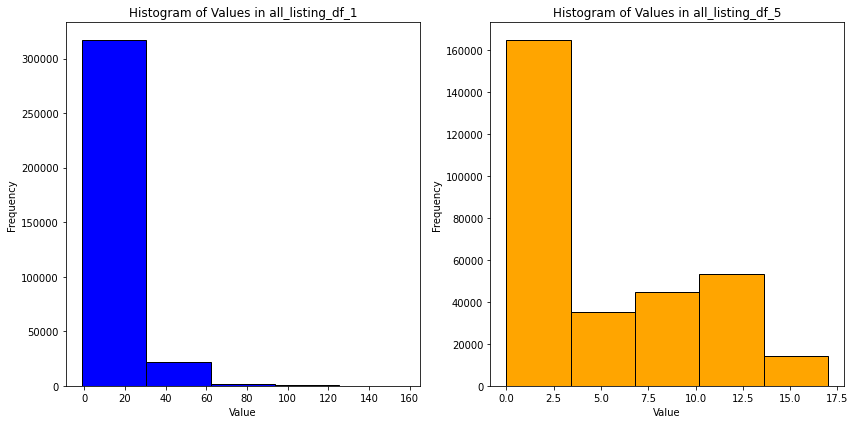

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

temp_df_1 = all_listing_df_1.copy()
temp_df_5 = all_listing_df_5.copy()

# Factorize 'property_type' for temporary DataFrames
temp_df_1['property_type'] = pd.factorize(temp_df_1['property_type'])[0]
temp_df_5['property_type'] = pd.factorize(temp_df_5['property_type'])[0]

plt.figure(figsize=(12, 6))

# Plot the histogram of 'property_type' in all_listing_df_1
plt.subplot(1, 2, 1)
temp_df_1['property_type'].plot(kind='hist', bins=5, edgecolor='black', color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values in all_listing_df_1')

# Plot the histogram of 'property_type' in all_listing_df_5
plt.subplot(1, 2, 2)
temp_df_5['property_type'].plot(kind='hist', bins=5, edgecolor='black', color='orange')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values in all_listing_df_5')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [100]:
all_listing_df_5["room_type"].value_counts()

room_type
Entire home/apt    238354
Private room        74177
Name: count, dtype: int64

Now, we are going to check that there are no erros in availability (e.g. that no property is available for more than 30 days per month)

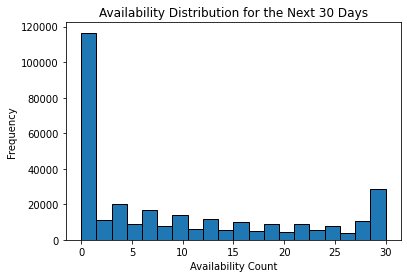

In [101]:
import matplotlib.pyplot as plt

plt.hist(all_listing_df_5["availability_30"], bins=20, edgecolor='black')  
plt.title("Availability Distribution for the Next 30 Days")
plt.xlabel("Availability Count")
plt.ylabel("Frequency")
plt.show()


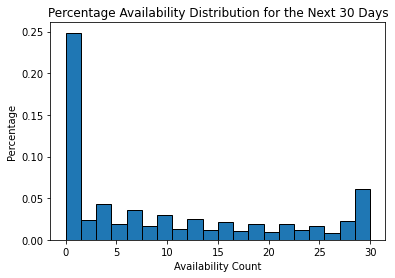

In [102]:
import matplotlib.pyplot as plt

# Assuming all_listing_df_5 is your DataFrame
plt.hist(all_listing_df_5["availability_30"], bins=20, density=True, edgecolor='black')  # density=True for percentage histogram
plt.title("Percentage Availability Distribution for the Next 30 Days")
plt.xlabel("Availability Count")
plt.ylabel("Percentage")
plt.show()


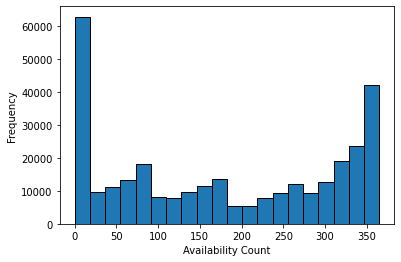

In [103]:
import matplotlib.pyplot as plt
plt.hist(all_listing_df_5["availability_365"], bins=20, edgecolor='black')  
plt.xlabel("Availability Count")
plt.ylabel("Frequency")
plt.show()


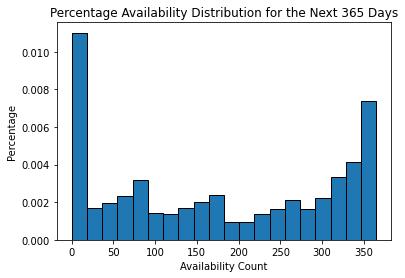

In [104]:
import matplotlib.pyplot as plt

# Assuming all_listing_df_5 is your DataFrame
plt.hist(all_listing_df_5["availability_365"], bins=20, density=True, edgecolor='black')  # density=True for percentage histogram
plt.title("Percentage Availability Distribution for the Next 365 Days")
plt.xlabel("Availability Count")
plt.ylabel("Percentage")
plt.show()


Since we focus on properties that are going to be rented out for short term stays (targeting tourists) we will now look at the minimum_nights column, and remove all properties that have a high requested minimum_nights (since these would be long term stays)

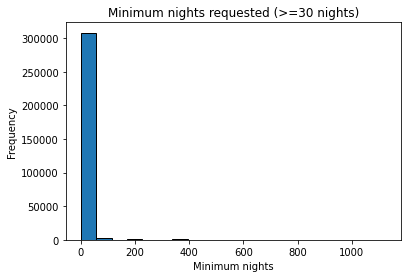

In [105]:
import matplotlib.pyplot as plt

plt.hist(all_listing_df_5["minimum_nights"], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Minimum nights requested (>=30 nights)")
plt.xlabel("Minimum nights")
plt.ylabel("Frequency")
plt.show()

##we can see that there are minimum nights close to 400 nights


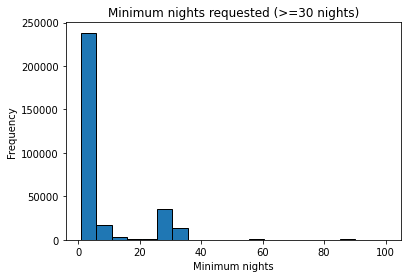

In [106]:
import matplotlib.pyplot as plt
filtered_df = all_listing_df_5[all_listing_df_5["minimum_nights"] <= 100]

plt.hist(filtered_df["minimum_nights"], bins=20, edgecolor='black') 
plt.title("Minimum nights requested (>=30 nights)")
plt.xlabel("Minimum nights")
plt.ylabel("Frequency")
plt.show()


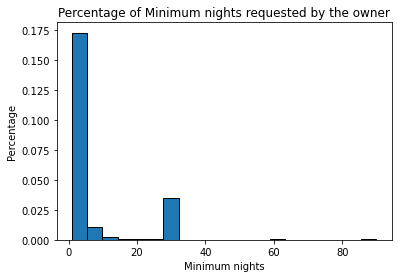

In [107]:
# Assuming all_listing_df_5 is your DataFrame
filtered_df = all_listing_df_5[all_listing_df_5["minimum_nights"] <= 90]
plt.hist(filtered_df["minimum_nights"], bins=20, density=True, edgecolor='black')  # density=True for percentage histogram
plt.title("Percentage of Minimum nights requested by the owner")
plt.xlabel("Minimum nights")
plt.ylabel("Percentage")
plt.show()

In [108]:
# Assuming all_listing_df_5 is your DataFrame

all_listing_df_5["minimum_nights"] = all_listing_df_5["minimum_nights"].astype(int)

counts = all_listing_df_5["minimum_nights"].value_counts(bins=range(0, max(all_listing_df_5["minimum_nights"]) + 31, 30))

# Calculate the percentage column
percentage_column = (counts / len(all_listing_df_5)) * 100

# Create a new DataFrame with counts and percentage_column
result_df = pd.DataFrame({'Counts': counts, 'Percentage': percentage_column})

# Print or display the result DataFrame
print(result_df)


                  Counts  Percentage
(-0.001, 30.0]    294842   94.340081
(30.0, 60.0]       14309    4.578426
(60.0, 90.0]        1315    0.420758
(90.0, 120.0]        509    0.162864
(150.0, 180.0]       487    0.155825
(360.0, 390.0]       463    0.148145
(180.0, 210.0]       124    0.039676
(120.0, 150.0]       113    0.036156
(270.0, 300.0]       102    0.032637
(330.0, 360.0]        70    0.022398
(990.0, 1020.0]       56    0.017918
(480.0, 510.0]        32    0.010239
(1110.0, 1140.0]      25    0.007999
(210.0, 240.0]        22    0.007039
(240.0, 270.0]        21    0.006719
(570.0, 600.0]         7    0.002240
(720.0, 750.0]         6    0.001920
(690.0, 720.0]         6    0.001920
(390.0, 420.0]         6    0.001920
(300.0, 330.0]         6    0.001920
(780.0, 810.0]         4    0.001280
(420.0, 450.0]         2    0.000640
(930.0, 960.0]         1    0.000320
(1080.0, 1110.0]       1    0.000320
(450.0, 480.0]         1    0.000320
(870.0, 900.0]         1    0.000320
(

We can see that more than 98% of all properties have requested a minimum stay of below 60. Therefore it makes sense to remove anything with minimum_nights requested above 60.  

In [109]:
# Assuming all_listing_df_5 is your DataFrame
all_listing_df_6 = all_listing_df_5[all_listing_df_5["minimum_nights"] <= 60]

#Display the filtered DataFrame
all_listing_df_6


id                property_type        room_type  \
0       2.818000e+03  Private room in rental unit     Private room   
1       2.016800e+04    Private room in townhouse     Private room   
3       2.887100e+04  Private room in rental unit     Private room   
4       2.905100e+04  Private room in rental unit     Private room   
5       4.439100e+04           Entire rental unit  Entire home/apt   
...              ...                          ...              ...   
342225  6.555674e+17  Private room in rental unit     Private room   
342226  3.820260e+07           Entire rental unit  Entire home/apt   
342227  4.205430e+07  Private room in rental unit     Private room   
342231  5.295024e+07           Entire rental unit  Entire home/apt   
342232  5.721959e+17    Entire serviced apartment  Entire home/apt   

        accommodates    price  minimum_nights  maximum_nights  \
0                2.0   $49.00               3            28.0   
1                2.0  $106.00               1           365.0   
3                2.0   $75.00               2          1825.0   
4                1.0   $55.00               2           730.0   
5                4.0  $240.00               3           730.0   
...              ...      ...             ...             ...   
342225           2.0   $85.00               1           365.0   
342226           3.0   $79.00               2          1125.0   
342227           1.0   $34.00              27          1125.0   
342231           4.0  $156.00               6          1125.0   
342232           6.0  $350.00               3            90.0   

        availability_30  availability_365   location  
0                   1.0              14.0  Amsterdam  
1                   0.0               0.0  Amsterdam  
3                   4.0             117.0  Amsterdam  
4                   0.0             160.0  Amsterdam  
5                   0.0               0.0  Amsterdam  
...                 ...               ...        ...  
342225              0.0               0.0     Zurich  
342226              0.0               0.0     Zurich  
342227              0.0               0.0     Zurich  
342231              1.0               1.0     Zurich  
342232              0.0               0.0     Zurich  

[309151 rows x 10 columns]

## Pricing Analysis

GABRIEL'S CODE IS PASTED BELOW:

In [110]:
#PLEASE CHECK IF THIS WORKS AND MAKES SENSE (i don't have enough ram in my laptop to concatenate the original dataframes ☠)

# WHEN RUNNING THIS, HAVE TO FIRST ADD BACK BEDS AND BEDROOMS TO THE DATA FRAME (AKA REMOVE THEM FROM THE "DROP" THING)
'''

# Plot distribution of prices
plt.figure(figsize=(12, 6))
sns.histplot(all_listing_df_6['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of prices by country
plt.figure(figsize=(14, 6))
sns.boxplot(x='region_name', y='price', data=all_listing_df_6)
plt.title('Distribution of Prices by Country')
plt.xlabel('Country')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate price per bedroom and price per bed
all_listing_df_6['price_per_bedroom'] = all_listing_df_6['price'] / all_listing_df_6['bedrooms']
all_listing_df_6['price_per_bed'] = all_listing_df_6['price'] / all_listing_df_6['beds']

# Plot distribution of price per bedroom and price per bed
plt.figure(figsize=(12, 6))
sns.histplot(all_listing_df_6['price_per_bedroom'], bins=30, kde=True, label='Price per Bedroom')
sns.histplot(all_listing_df_6['price_per_bed'], bins=30, kde=True, label='Price per Bed')
plt.title('Distribution of Price per Bedroom and Price per Bed')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot distribution of price per bedroom and price per bed by country
plt.figure(figsize=(14, 6))
sns.boxplot(x='region_name', y='price_per_bedroom', data=all_listing_df_6, label='Price per Bedroom')
sns.boxplot(x='region_name', y='price_per_bed', data=all_listing_df_6, label='Price per Bed')
plt.title('Distribution of Price per Bedroom and Price per Bed by Country')
plt.xlabel('Country')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

'''

"\n\n# Plot distribution of prices\nplt.figure(figsize=(12, 6))\nsns.histplot(all_listing_df_6['price'], bins=30, kde=True)\nplt.title('Distribution of Prices')\nplt.xlabel('Price')\nplt.ylabel('Frequency')\nplt.show()\n\n# Plot distribution of prices by country\nplt.figure(figsize=(14, 6))\nsns.boxplot(x='region_name', y='price', data=all_listing_df_6)\nplt.title('Distribution of Prices by Country')\nplt.xlabel('Country')\nplt.ylabel('Price')\nplt.xticks(rotation=45, ha='right')\nplt.show()\n\n# Calculate price per bedroom and price per bed\nall_listing_df_6['price_per_bedroom'] = all_listing_df_6['price'] / all_listing_df_6['bedrooms']\nall_listing_df_6['price_per_bed'] = all_listing_df_6['price'] / all_listing_df_6['beds']\n\n# Plot distribution of price per bedroom and price per bed\nplt.figure(figsize=(12, 6))\nsns.histplot(all_listing_df_6['price_per_bedroom'], bins=30, kde=True, label='Price per Bedroom')\nsns.histplot(all_listing_df_6['price_per_bed'], bins=30, kde=True, label=

UPDATED CODE BELOW:

We want to see the distribution of property prices throughout the listings data set to see if there are any obvious outliers.

For simplicity, we will calculate the price per person accomodated in each property. This is because it allows us to understand how much each person in the property pays, and thus allows investors looking to buy a property to rent on Airbnb to know how much an average guest will pay them for a night in their property. Additionally, the investor can then decide based on their budget how many guests their property should accomodate (aka how big should the property be for the revenue they want to achieve). 


In [111]:
# make a new data frame
all_listing_df_7 = all_listing_df_6.copy()

# convert price column from an object to a float (also by removing the dollar sign)
all_listing_df_7['price'] = all_listing_df_7['price'].str.replace(',', '').str.replace('$', '')
all_listing_df_7['price'] = pd.to_numeric(all_listing_df_7['price'], errors='coerce')

all_listing_df_7


id                property_type        room_type  \
0       2.818000e+03  Private room in rental unit     Private room   
1       2.016800e+04    Private room in townhouse     Private room   
3       2.887100e+04  Private room in rental unit     Private room   
4       2.905100e+04  Private room in rental unit     Private room   
5       4.439100e+04           Entire rental unit  Entire home/apt   
...              ...                          ...              ...   
342225  6.555674e+17  Private room in rental unit     Private room   
342226  3.820260e+07           Entire rental unit  Entire home/apt   
342227  4.205430e+07  Private room in rental unit     Private room   
342231  5.295024e+07           Entire rental unit  Entire home/apt   
342232  5.721959e+17    Entire serviced apartment  Entire home/apt   

        accommodates  price  minimum_nights  maximum_nights  availability_30  \
0                2.0   49.0               3            28.0              1.0   
1                2.0  106.0               1           365.0              0.0   
3                2.0   75.0               2          1825.0              4.0   
4                1.0   55.0               2           730.0              0.0   
5                4.0  240.0               3           730.0              0.0   
...              ...    ...             ...             ...              ...   
342225           2.0   85.0               1           365.0              0.0   
342226           3.0   79.0               2          1125.0              0.0   
342227           1.0   34.0              27          1125.0              0.0   
342231           4.0  156.0               6          1125.0              1.0   
342232           6.0  350.0               3            90.0              0.0   

        availability_365   location  
0                   14.0  Amsterdam  
1                    0.0  Amsterdam  
3                  117.0  Amsterdam  
4                  160.0  Amsterdam  
5                    0.0  Amsterdam  
...                  ...        ...  
342225               0.0     Zurich  
342226               0.0     Zurich  
342227               0.0     Zurich  
342231               1.0     Zurich  
342232               0.0     Zurich  

[309151 rows x 10 columns]

In [112]:
# next, let's conver the currencies. The data set has 6 currencies: Euros, Swiss franks, mexican pesos, US dollars, Canadian dollars and the
# Japanese Yen. We will keep the currencies in Euros because most properties are in Euros

# make a numpy array with the currency conversion rate in the order specified below (excluding Euro):

currency_convert = np.array([1.05, 0.052, 0.92, 0.67, 0.0062]) # Swiss frank, mexican peso, US dollar, Canadian dollar, Japanese Yen


US_locations = ["Los Angeles", "San Diego", "San Francisco", "Washington"]
Canada_locations = ["Toronto", "Vancouver", "Winnipeg"]
Swiss_locations = ["Geneva","Zurich"]
Japan_locations = ["Tokyo"]
Mexico_locations = ["Mexico City"]

# make a new column for the prices in euros
all_listing_df_7["Euro_price"] = 0  # for now make the column only zeroes, will be edited later

# convert the price_per_guest to Euros
for location in all_listing_df_7["location"].unique():
    if location in Swiss_locations:
        all_listing_df_7.loc[all_listing_df_7['location'] == location, "Euro_price"] = all_listing_df_7.loc[all_listing_df_7['location'] == location, "price"] * currency_convert[0]
    elif location in Mexico_locations:
        all_listing_df_7.loc[all_listing_df_7['location'] == location, "Euro_price"] = all_listing_df_7.loc[all_listing_df_7['location'] == location, "price"] * currency_convert[1]
    elif location in US_locations:
        all_listing_df_7.loc[all_listing_df_7['location'] == location, "Euro_price"] = all_listing_df_7.loc[all_listing_df_7['location'] == location, "price"] * currency_convert[2]
    elif location in Canada_locations:
        all_listing_df_7.loc[all_listing_df_7['location'] == location, "Euro_price"] = all_listing_df_7.loc[all_listing_df_7['location'] == location, "price"] * currency_convert[3]
    elif location in Japan_locations:
        all_listing_df_7.loc[all_listing_df_7['location'] == location, "Euro_price"] = all_listing_df_7.loc[all_listing_df_7['location'] == location, "price"] * currency_convert[4]
    else:
        all_listing_df_7.loc[all_listing_df_7['location'] == location, "Euro_price"] = all_listing_df_7.loc[all_listing_df_7['location'] == location, "price"]

# round the prices to two decial points
all_listing_df_7["Euro_price"] = round(all_listing_df_7["Euro_price"],2)

# calculate price per guest of each property (note that this is still in the location currency)
all_listing_df_7["price_per_guest"] = round(all_listing_df_7["Euro_price"]/all_listing_df_7["accommodates"],2)

# show the dataframe
all_listing_df_7


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\4277020125.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 72.45 105.    32.55 ...  50.4   40.95  73.5 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  all_listing_df_7.loc[all_listing_df_7['location'] == location, "Euro_price"] = all_listing_df_7.loc[all_listing_df_7['location'] == location, "price"] * currency_convert[0]


id                property_type        room_type  \
0       2.818000e+03  Private room in rental unit     Private room   
1       2.016800e+04    Private room in townhouse     Private room   
3       2.887100e+04  Private room in rental unit     Private room   
4       2.905100e+04  Private room in rental unit     Private room   
5       4.439100e+04           Entire rental unit  Entire home/apt   
...              ...                          ...              ...   
342225  6.555674e+17  Private room in rental unit     Private room   
342226  3.820260e+07           Entire rental unit  Entire home/apt   
342227  4.205430e+07  Private room in rental unit     Private room   
342231  5.295024e+07           Entire rental unit  Entire home/apt   
342232  5.721959e+17    Entire serviced apartment  Entire home/apt   

        accommodates  price  minimum_nights  maximum_nights  availability_30  \
0                2.0   49.0               3            28.0              1.0   
1                2.0  106.0               1           365.0              0.0   
3                2.0   75.0               2          1825.0              4.0   
4                1.0   55.0               2           730.0              0.0   
5                4.0  240.0               3           730.0              0.0   
...              ...    ...             ...             ...              ...   
342225           2.0   85.0               1           365.0              0.0   
342226           3.0   79.0               2          1125.0              0.0   
342227           1.0   34.0              27          1125.0              0.0   
342231           4.0  156.0               6          1125.0              1.0   
342232           6.0  350.0               3            90.0              0.0   

        availability_365   location  Euro_price  price_per_guest  
0                   14.0  Amsterdam       49.00            24.50  
1                    0.0  Amsterdam      106.00            53.00  
3                  117.0  Amsterdam       75.00            37.50  
4                  160.0  Amsterdam       55.00            55.00  
5                    0.0  Amsterdam      240.00            60.00  
...                  ...        ...         ...              ...  
342225               0.0     Zurich       89.25            44.62  
342226               0.0     Zurich       82.95            27.65  
342227               0.0     Zurich       35.70            35.70  
342231               1.0     Zurich      163.80            40.95  
342232               0.0     Zurich      367.50            61.25  

[309151 rows x 12 columns]

In [113]:
# Find the largest value in the price_per_guest column

all_listing_df_7["price_per_guest"].max()

99149.0

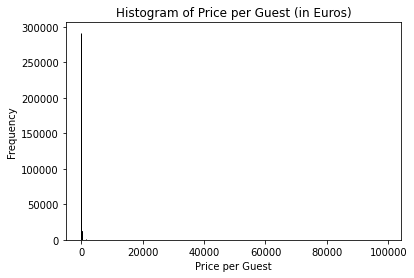

In [114]:
# now, we can plot the distribution of the prices per guest to detect any outliers

# Since the maximal value is so high, we will account for it in the histogram for now. For clarity and run time, we will use bins of width 100
plt.hist(all_listing_df_7['price_per_guest'], bins=range(0, 99150, 100), edgecolor='black')  # bins of 100 values (easier to see)
plt.xlabel('Price per Guest')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Guest (in Euros)')
plt.show()

In [115]:
# This is clearly inefficient since pretty much all of the data is much lower. We will thus plot a histogram with only data within the 
# bottom 99% percentile

percentile_threshold = 0.99

# Calculate the threshold value
threshold_value = all_listing_df_7['price_per_guest'].quantile(percentile_threshold)

# Filter the DataFrame to include only values within the bottom 95% percentile
all_listing_df_8 = all_listing_df_7[all_listing_df_7['price_per_guest'] <= threshold_value]

all_listing_df_8["price_per_guest"].max()


250.0

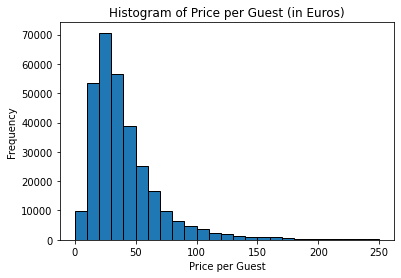

In [116]:

# plot the new histogram:
plt.hist(all_listing_df_8['price_per_guest'], bins=range(0, 260, 10), edgecolor='black')  # bins of 10 values (arbitrary value, just for us to see the distirbution clearly)
plt.xlabel('Price per Guest')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Guest (in Euros)')
plt.show()


In [117]:
# This still seems like too big of a distribution. Considering that we are assuming that our investor has a fairly average budget, it is 
# unlikley that they will be able to afford to buy a property that is expensive enough to be worth more than around 100 euros per night per 
# person. As such, we will narrow down our values such that we only use values in the bottom 95% percentile.

percentile_threshold = 0.95

# Calculate the threshold value
threshold_value = all_listing_df_7['price_per_guest'].quantile(percentile_threshold)

# Filter the DataFrame to include only values within the bottom 95% percentile
all_listing_df_8 = all_listing_df_7[all_listing_df_7['price_per_guest'] <= threshold_value]

all_listing_df_8["price_per_guest"].max()


103.0

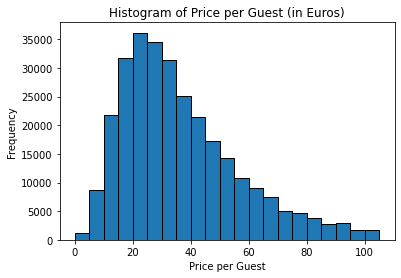

In [118]:
# plot the new histogram:

# note that here we will use bins of width 5, simply because it makes the data cleaner and easier to read. Additionally, it is unrealistic
# that when buying a property the investor knows exactly how much he will be charging per room; it is more likley that they will have a 
# rough idea of the price range. Hence, using bins > 1 makes sense. 

plt.hist(all_listing_df_8['price_per_guest'], bins=range(0, 110, 5), edgecolor='black')  # bins of 5 values 
plt.xlabel('Price per Guest')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Guest (in Euros)')
plt.show()



As such, the final data frame with all suitable property listings is all_listing_df_8

## Consistency Analysis

### Creating dataset for average avaliability of listings per month per city

In [119]:

## add code that checks for the id 

def load_rental_data(city_name):
    """
    Load rental data for a specific city from a subdirectory.
    
    Parameters:
    - city_name (str): The name of the city.

    Returns:
    - pd.DataFrame: The loaded DataFrame.
    """
    # Construct the directory path based on the city name
    directory_path = f"home_rentals/{city_name}"
    
    # Assuming the file is named 'calendar.csv.gz'
    file_path = f"{directory_path}/calendar.csv.gz"
    
    try:
        # Load the DataFrame from the specified file
        df = pd.read_csv(file_path, compression='gzip')
        
        # You can perform additional processing on the DataFrame if needed
        
        # Return the loaded DataFrame
        return df
    except FileNotFoundError:
        # Handle the case where the file is not found
        print(f"Data not found for {city_name}. Check the directory path and file name.")
        return None
    

def filter_ids(df1, df2):
    """
    Filter out ID values in df1 that are not available in df2.

    Parameters:
    - df1 (pd.DataFrame): The first DataFrame.
    - df2 (pd.DataFrame): The second DataFrame.
    - id_column (str): The column containing the ID values.

    Returns:
    - pd.DataFrame: The filtered DataFrame.
    """
    id_column = "id"
    filtered_df = df1[df1["listing_id"].isin(df2["id"])]
    return filtered_df



def averageavaliability(city, latest_df):

    cityname = city
    citydata = load_rental_data(cityname) 

    #filter our ID's that are NOT present in our cleaned all_listings 

    filtered_citydata = filter_ids(citydata, latest_df)
    
    filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
    filtered_citydata["month"] = filtered_citydata["date"].dt.month
    filtered_citydata["year"] = filtered_citydata["date"].dt.year
    filtered_citydata['month_year'] = filtered_citydata['month'].astype(str) + '-' + filtered_citydata['year'].astype(str)

    # make a new data frame
    ave_month = (filtered_citydata[filtered_citydata['available'] == 't'].groupby(['listing_id', 'month_year']).size().unstack(fill_value=0).stack().reset_index(name='days_available'))
    
    # Calculate the average days_available for each month_year (making sure that it rounds to full numbers)
    ave_month = (ave_month.groupby('month_year')['days_available'].mean().round(0).reset_index(name='average_days_available'))
    # convert the month_year column to datetime format 
    ave_month['month_year'] = pd.to_datetime(ave_month['month_year'], format='%m-%Y').dt.to_period('M')

    # sort the rows by ascending dates
    ave_month = ave_month.sort_values('month_year')

    # reset the row index
    ave_month.reset_index(drop=True, inplace=True)

    ave_month['location'] = city

    return ave_month




In [120]:
# Will take 10 mins to run but it WORKSSSSSS SLAY

all_locations = all_listing_df_8["location"].unique()

average_by_month = pd.DataFrame()

for location in all_locations:
    ave_month = averageavaliability(location, all_listing_df_8)
    average_by_month = pd.concat([average_by_month, ave_month], axis=0)
    print(location)


    

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Amsterdam


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Barcelona


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Euskadi


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Geneva


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Ireland


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Lisbon


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Los Angeles
Madrid


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Malaga


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Mallorca


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Malta


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Menorca


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Mexico City


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Milan


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Naples


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Rome


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Rotterdam


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

San Diego


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

San Francisco


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Tokyo


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Toronto


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Valencia


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Vancouver


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Vienna


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Washington


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Winnipeg


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Zurich


C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3489930091.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata['month_year'] = filtered_citydata['month'].astype(str) + '-' + filtered_citydata['year'].astype(str)


In [121]:
# note that all of the properties in Madrid have no listing ID in the listings data file. Thus, we cannot merge the calendar and the listings
# data for the city because we do not have the corresponding IDs. As such, the function removed all of the Madrid properties. 

average_by_month["location"].unique()

array(['Amsterdam', 'Barcelona', 'Euskadi', 'Geneva', 'Ireland', 'Lisbon',
       'Los Angeles', 'Malaga', 'Mallorca', 'Malta', 'Menorca',
       'Mexico City', 'Milan', 'Naples', 'Rome', 'Rotterdam', 'San Diego',
       'San Francisco', 'Tokyo', 'Toronto', 'Valencia', 'Vancouver',
       'Vienna', 'Washington', 'Winnipeg', 'Zurich'], dtype=object)

### Correcting for additional months

In [122]:
# check for the unique "month_year" vaues in the average_by_month dataframe. This allows us to see what months are covered by the data
average_by_month["month_year"].unique()


<PeriodArray>
['2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
 '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10']
Length: 14, dtype: period[M]

In [123]:
# All of the locations should have data from 2022-09 until 2023-09. From above, we see that some locations also have 2023-10
# loop through the dataframe and remove observations in 2023-10 for any locations that may have them

# Create a boolean mask based on the specified conditions
mask = average_by_month['month_year'] == "2023-10"

# Use the boolean mask to filter the DataFrame and keep only the rows that don't match the conditions
average_by_month = average_by_month[~mask]

# check that we got the result we wanted
average_by_month["month_year"].value_counts()



month_year
2022-09    26
2022-10    26
2022-11    26
2022-12    26
2023-01    26
2023-02    26
2023-03    26
2023-04    26
2023-05    26
2023-06    26
2023-07    26
2023-08    26
2023-09    26
Freq: M, Name: count, dtype: int64

### Seasonality Analysis

Next, we will look at the seasonality of each month for each location, comparing it between the locations and calculating a seasonality index. We do this so as to have an idea of how consistent the bookings are per month for each location.

In [124]:
# Calculate the seasonality index for each month of each location

# find the average availability per month between all locations
seasonality_df = average_by_month
seasonality_df['Average'] = seasonality_df.groupby('month_year')['average_days_available'].transform('mean')

# calculate the seasonality index for each location's month and append it to the dataframe 
seasonality_df['Seasonality_Index_%'] = round((seasonality_df['average_days_available'] / seasonality_df['Average']) * 100,1)

# remove the Average column since it is no longer needed
#seasonality_df = seasonality_df.drop("Average", axis=1)

# show the data frame 
seasonality_df




month_year  average_days_available   location    Average  \
0     2022-09                     3.0  Amsterdam   3.730769   
1     2022-10                     6.0  Amsterdam  14.269231   
2     2022-11                    10.0  Amsterdam  18.500000   
3     2022-12                    10.0  Amsterdam  19.038462   
4     2023-01                    13.0  Amsterdam  19.307692   
..        ...                     ...        ...        ...   
8     2023-05                    15.0     Zurich  16.576923   
9     2023-06                    14.0     Zurich  15.500000   
10    2023-07                    14.0     Zurich  15.500000   
11    2023-08                    15.0     Zurich  15.730769   
12    2023-09                    11.0     Zurich   8.307692   

    Seasonality_Index_%  
0                  80.4  
1                  42.0  
2                  54.1  
3                  52.5  
4                  67.3  
..                  ...  
8                  90.5  
9                  90.3  
10                 90.3  
11                 95.4  
12                132.4  

[338 rows x 5 columns]

The seasonality index indicates how the availability per month of each location varies with respect to a seasonal pattern. A seasonality index value above 100% indicates a period of higher demand or availability compared to the average. A seasonality index value below 100%, instead, indicates a period of lower demand or availability compared to the average. Finally, a seasonality index of 100% suggests that the availability is in line with the average, without any significant seasonal deviation.

In order to visualise the above results better, we will generate a bar graph for each location showing the average days available and the seasonality of each month in the location. In this way, we can get a better idea of the actual days of availability per month in each location, and how this value compares with other locations (we see this via the seasonality index).

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


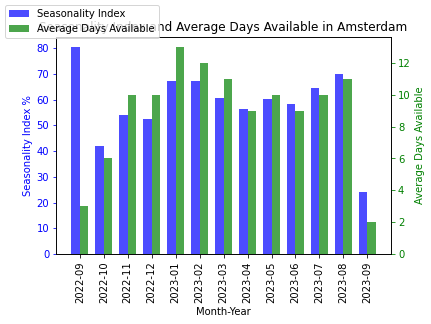

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


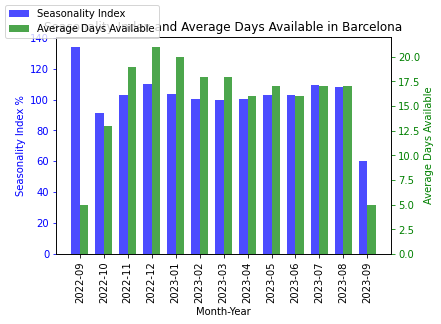

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


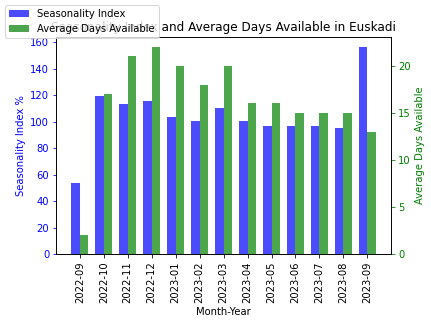

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


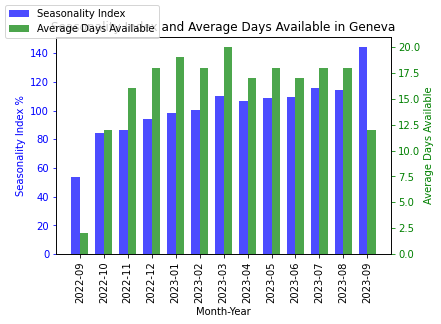

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


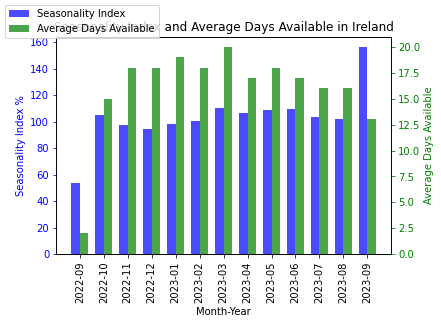

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


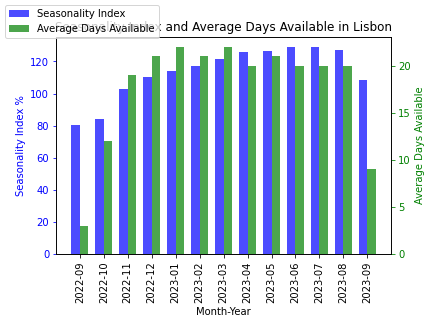

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


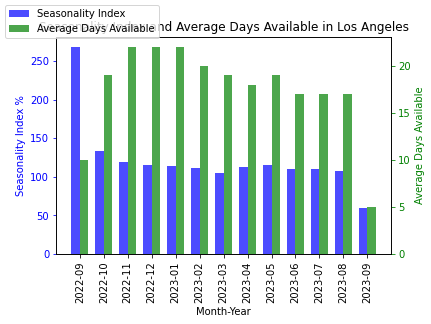

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


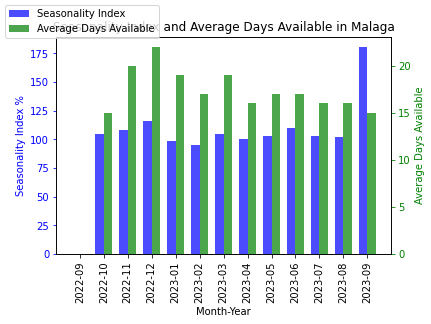

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


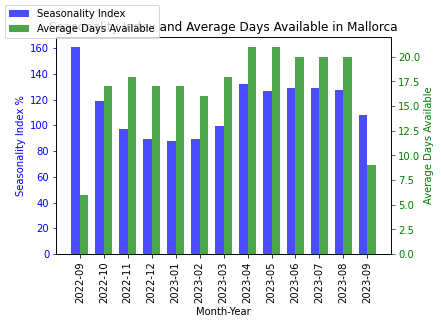

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


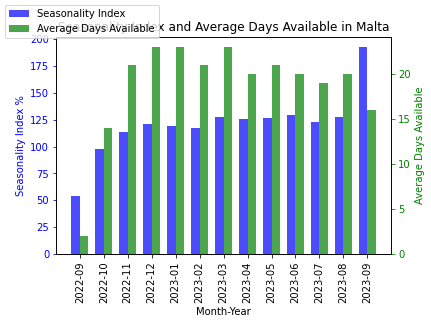

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


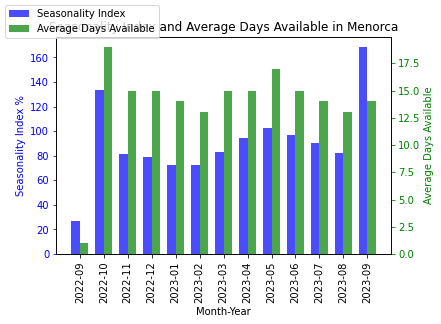

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


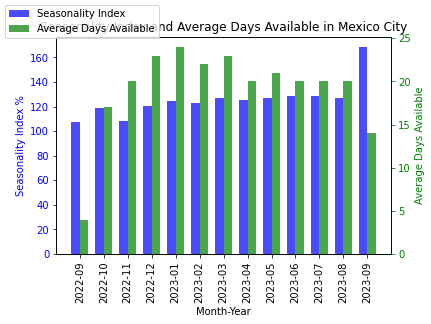

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


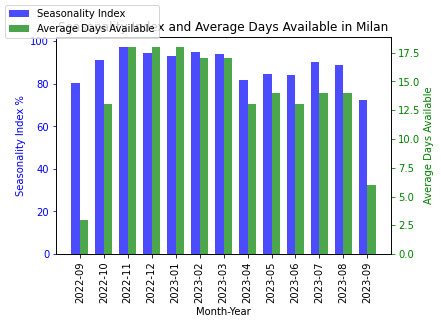

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


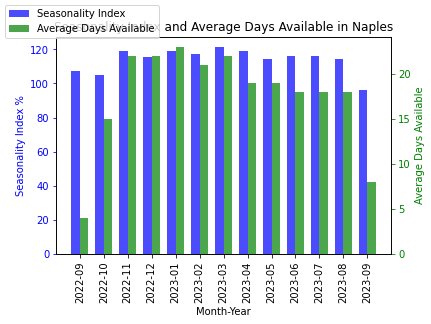

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


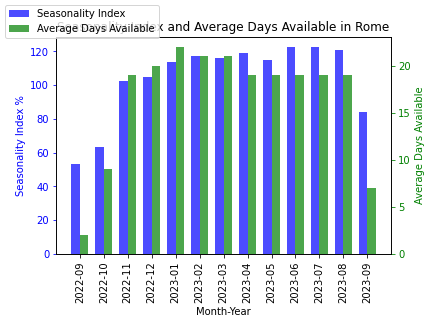

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


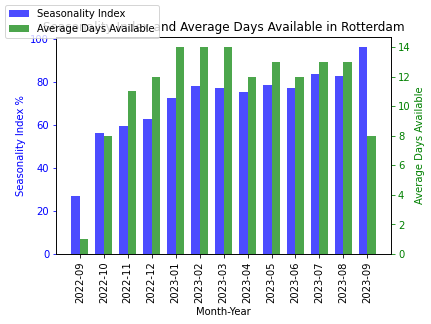

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


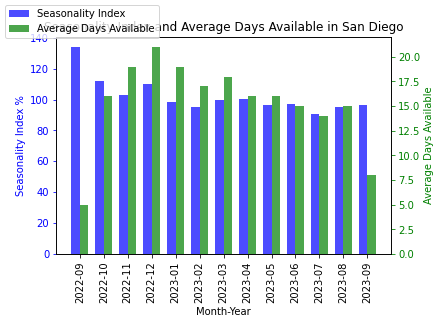

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


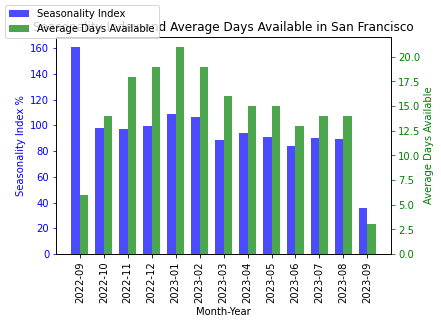

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


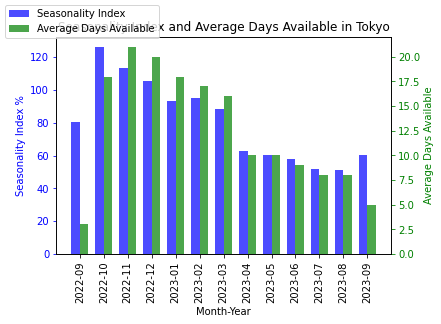

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


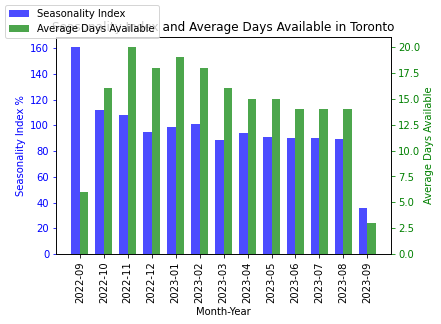

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


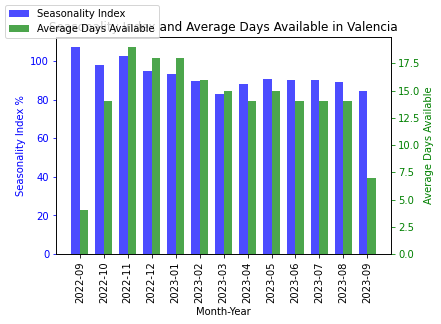

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


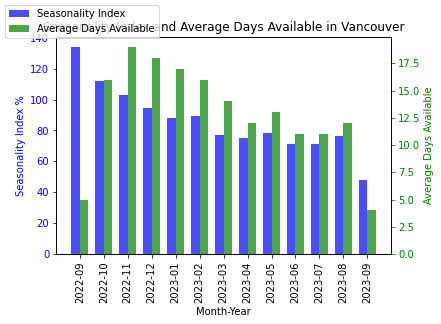

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


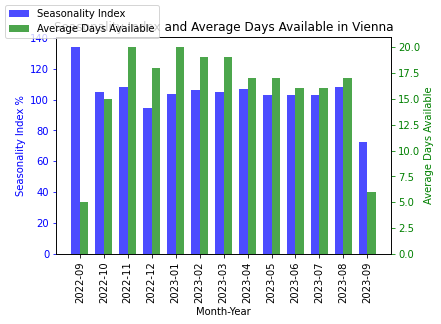

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


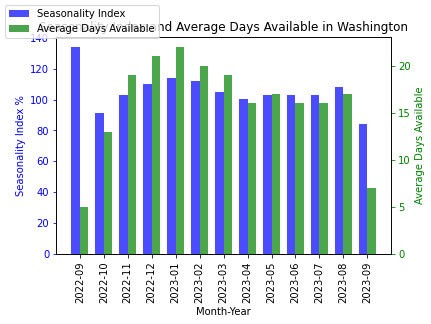

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


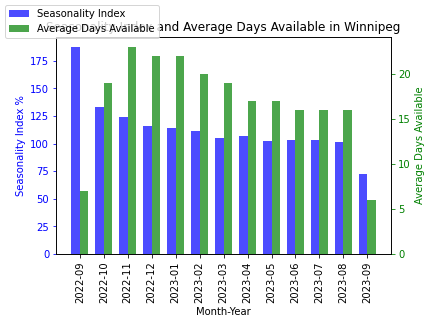

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


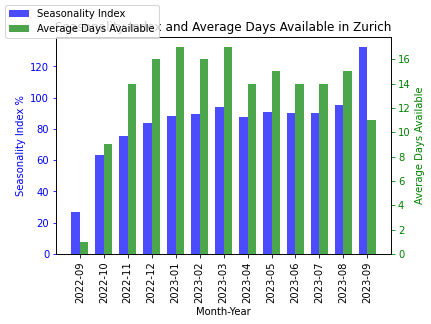

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the monthly availability and seasonality index for each location

all_the_locations = average_by_month["location"].unique()

# Set the width of the bars
bar_width = 0.35

# Make the bar charts
for location in all_the_locations:

    season_given_location = seasonality_df[seasonality_df["location"] == location]
    location_name = average_by_month[average_by_month['location'] == location]

    av_si = season_given_location['Seasonality_Index_%']
    av_availability = location_name['average_days_available']

    season_given_location['month_year'] = season_given_location['month_year'].astype(str)
    location_name['month_year'] = location_name['month_year'].astype(str)

    # Create a figure and primary y-axis
    fig, ax1 = plt.subplots()

    # Plot Seasonality Index on the primary y-axis
    ax1.bar(np.arange(len(season_given_location['month_year'])), av_si, width=bar_width, color='blue', alpha=0.7, label='Seasonality Index')
    ax1.set_xlabel('Month-Year')
    ax1.set_ylabel('Seasonality Index %', color='blue')
    ax1.tick_params('y', colors='blue')
    ax1.set_title(f'Seasonality Index and Average Days Available in {location}')

    # Create a twin Axes sharing the x-axis
    ax2 = ax1.twinx()

    # Plot Average Days Available on the secondary y-axis
    ax2.bar(np.arange(len(location_name['month_year'])) + bar_width, av_availability, width=bar_width, color='green', alpha=0.7, label='Average Days Available')
    ax2.set_ylabel('Average Days Available', color='green')
    ax2.tick_params('y', colors='green')

    # Set x-axis ticks and labels
    ax1.set_xticks(np.arange(len(season_given_location['month_year'])) + bar_width / 2)
    ax1.set_xticklabels(season_given_location['month_year'], rotation=90)

    # Display the legend
    fig.legend(loc='upper left')

    # Show the plot
    plt.show()


The graphs above allow us to gain a better understanding of the distribution of our data, however there is too much data (and thus it is too specific) for it to be useful when building models. As such, we will calculate a single seasonality index for each location. 

In [126]:
# Calculate the seasonality index for each location

# find the average availability for each locations
seasonality_per_location_df = pd.DataFrame()

seasonality_per_location_df["location"] = average_by_month["location"].unique()

# calculate one average availability per location
for location in all_locations:
    average_avail_per_loc_df = average_by_month.groupby('location')['average_days_available'].mean().reset_index()

# add the average availability of each location to the data frame:
seasonality_per_location_df["average_availability"] = average_avail_per_loc_df["average_days_available"]

# calculate the average availabiity between all locations
average_availbility = average_avail_per_loc_df["average_days_available"].mean()

# calculate the seasonality index for each location and append it to the dataframe 
seasonality_per_location_df['Seasonality_Index_%'] = round((seasonality_per_location_df["average_availability"] / average_availbility) * 100,1)

# show the data frame 
seasonality_per_location_df


location  average_availability  Seasonality_Index_%
0       Amsterdam              8.923077                 58.5
1       Barcelona             15.538462                101.8
2         Euskadi             16.153846                105.9
3          Geneva             15.769231                103.3
4         Ireland             15.923077                104.3
5          Lisbon             17.692308                115.9
6     Los Angeles             17.461538                114.4
7          Malaga             16.076923                105.4
8        Mallorca             16.923077                110.9
9           Malta             18.692308                122.5
10        Menorca             13.846154                 90.7
11    Mexico City             19.076923                125.0
12          Milan             13.692308                 89.7
13         Naples             17.615385                115.4
14           Rome             16.615385                108.9
15      Rotterdam             11.153846                 73.1
16      San Diego             15.307692                100.3
17  San Francisco             14.384615                 94.3
18          Tokyo             12.538462                 82.2
19        Toronto             14.461538                 94.8
20       Valencia             14.000000                 91.7
21      Vancouver             12.923077                 84.7
22         Vienna             15.769231                103.3
23     Washington             16.000000                104.8
24       Winnipeg             16.923077                110.9
25         Zurich             13.307692                 87.2

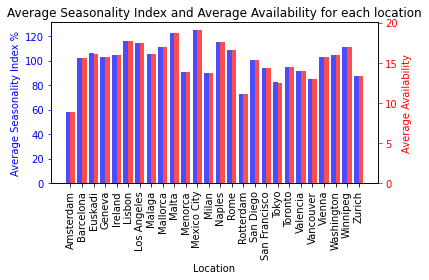

In [127]:
# let's plot the seasonality index and average availability of all locations on one graph:

import matplotlib.pyplot as plt
import numpy as np

# make the bar chart
fig, ax1 = plt.subplots()
bar_width = 0.4
indices = np.arange(len(seasonality_per_location_df['location']))

# plot first axis
ax1.bar(indices - bar_width / 2, seasonality_per_location_df['Seasonality_Index_%'], color='b', alpha=0.7, label='Average Seasonality Index %', width=bar_width)
ax1.set_xlabel('Location')
ax1.set_ylabel('Average Seasonality Index %', color='b')
ax1.set_xticks(indices)
ax1.set_xticklabels(seasonality_per_location_df['location'], rotation=90)  # Rotate x-axis labels vertically
ax1.tick_params('y', colors='b')

# Twin axis for Average Availability on the right axis
ax2 = ax1.twinx()
# Adjust the x-coordinates for the second set of bars
ax2.bar(indices + bar_width / 2, seasonality_per_location_df['average_availability'], color='r', alpha=0.7, label='Average Availability', width=bar_width)
ax2.set_ylabel('Average Availability', color='r')
ax2.tick_params('y', colors='r')

# Title and legend
plt.title('Average Seasonality Index and Average Availability for each location')
fig.tight_layout()
plt.show()

As expected, the average seasonality index and the average availability distributions exactly match each other. This is because, to calculate the seasonality, we are simply taking the average availability of the location and multiplying it by a constant (100 / average availability of data set). 


## Profitability

Although the seasonality index gives us a good insight of the general distribution of availabilities of locations, we have determined that it is superfluous in the context of building our models. This is because the objective of the model is to tell an investor where the best location to buy a property destined to be rented out on Airbnb would be, and thus the investor is not interested in the monthly seasonality of the location, but rather the yearly one (since the property is to be rented out for the whole year). However, since the yearly seasonality index is matched by the average availability of the property, it is easier to simply look at the average availability of the locations and discard the seasonality index. 

First of all, we have to define the metric that we want our models to calculate. In this case, we want the models to tell us what the most profitable location to buy a property to then rent on Airbnb would be. We can calculate profitability by calculating how many nights on average properties in each location are booked per month multiplied by the average price per guest paid per night. 

In [128]:
# first, have to find the average price_per_guest per location

# create the new data frame 
average_ppg_per_location_wM = all_listing_df_8.groupby('location')['price_per_guest'].mean().reset_index(name='average_price_per_guest')

# round the values to 2 decimal places
average_ppg_per_location_wM['average_price_per_guest'] = round(average_ppg_per_location_wM['average_price_per_guest'],2)

# also, have to remember to remove the data for Madrid since the ave_month data frame doesn't have any data for it (as explained earlier)
average_ppg_per_location = average_ppg_per_location_wM[average_ppg_per_location_wM['location'] != "Madrid"]

# reset the index
average_ppg_per_location = average_ppg_per_location.reset_index(drop=True)

# show the new data frame
average_ppg_per_location


location  average_price_per_guest
0       Amsterdam                    60.68
1       Barcelona                    35.74
2         Euskadi                    35.02
3          Geneva                    42.50
4         Ireland                    36.44
5          Lisbon                    32.82
6     Los Angeles                    45.41
7          Malaga                    27.96
8        Mallorca                    41.39
9           Malta                    27.28
10        Menorca                    30.15
11    Mexico City                    20.48
12          Milan                    41.20
13         Naples                    27.84
14           Rome                    35.35
15      Rotterdam                    42.49
16      San Diego                    46.51
17  San Francisco                    52.84
18          Tokyo                    17.12
19        Toronto                    37.63
20       Valencia                    28.42
21      Vancouver                    40.99
22         Vienna                    27.05
23     Washington                    40.80
24       Winnipeg                    22.33
25         Zurich                    52.66

In [129]:
# Next, calculate the average monthly availability of each location (note that the latter comes from the average_by_month dataframe)

average_availbility_per_location = pd.DataFrame()

average_availbility_per_location["location"] = average_by_month["location"].unique()

# calculate one average availability per location
for location in all_locations:
    average_availbility_per_location = average_by_month.groupby('location')['average_days_available'].mean().reset_index()

# show the data frame
average_availbility_per_location

location  average_days_available
0       Amsterdam                8.923077
1       Barcelona               15.538462
2         Euskadi               16.153846
3          Geneva               15.769231
4         Ireland               15.923077
5          Lisbon               17.692308
6     Los Angeles               17.461538
7          Malaga               16.076923
8        Mallorca               16.923077
9           Malta               18.692308
10        Menorca               13.846154
11    Mexico City               19.076923
12          Milan               13.692308
13         Naples               17.615385
14           Rome               16.615385
15      Rotterdam               11.153846
16      San Diego               15.307692
17  San Francisco               14.384615
18          Tokyo               12.538462
19        Toronto               14.461538
20       Valencia               14.000000
21      Vancouver               12.923077
22         Vienna               15.769231
23     Washington               16.000000
24       Winnipeg               16.923077
25         Zurich               13.307692

In [130]:
# we then have to use the average availability per location to calculate the average days booked 
# since we have an average value for each month, we will have to use the average days between all months to find the days booked (note that 
# 2023 was not a leap year, thus take 29 days for february). 

average_days_in_month = (31*7 + 30*4 + 28)/12

average_bookings_per_location = pd.DataFrame()

average_bookings_per_location["location"] = average_availbility_per_location['location']
average_bookings_per_location["average_days_booked"] = average_days_in_month - average_availbility_per_location["average_days_available"]

# round to a full number of days
average_bookings_per_location["average_days_booked"] = round(average_bookings_per_location["average_days_booked"],0)

# show dataframe
average_bookings_per_location



location  average_days_booked
0       Amsterdam                 21.0
1       Barcelona                 15.0
2         Euskadi                 14.0
3          Geneva                 15.0
4         Ireland                 14.0
5          Lisbon                 13.0
6     Los Angeles                 13.0
7          Malaga                 14.0
8        Mallorca                 13.0
9           Malta                 12.0
10        Menorca                 17.0
11    Mexico City                 11.0
12          Milan                 17.0
13         Naples                 13.0
14           Rome                 14.0
15      Rotterdam                 19.0
16      San Diego                 15.0
17  San Francisco                 16.0
18          Tokyo                 18.0
19        Toronto                 16.0
20       Valencia                 16.0
21      Vancouver                 17.0
22         Vienna                 15.0
23     Washington                 14.0
24       Winnipeg                 13.0
25         Zurich                 17.0

In [131]:
# now, we can calculate the profitability by multiplying the average price paid per guest in each location with the average days booked in each 
# location (this value is for a month)

profitability_per_location = pd.DataFrame()

# add a location and profitability column
profitability_per_location["location"] = average_bookings_per_location["location"]
profitability_per_location["profitability"] = 0


# calculate the profitability per column and write it in
for location in profitability_per_location["location"]:
    profitability_per_location.loc[profitability_per_location["location"]== location, "profitability"] = average_bookings_per_location.loc[average_bookings_per_location["location"] == location, "average_days_booked"] * average_ppg_per_location.loc[average_ppg_per_location["location"] == location, 'average_price_per_guest']

# show the data frame
profitability_per_location

C:\Users\elisa\AppData\Local\Temp\ipykernel_5256\336204506.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1274.28]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  profitability_per_location.loc[profitability_per_location["location"]== location, "profitability"] = average_bookings_per_location.loc[average_bookings_per_location["location"] == location, "average_days_booked"] * average_ppg_per_location.loc[average_ppg_per_location["location"] == location, 'average_price_per_guest']


location  profitability
0       Amsterdam        1274.28
1       Barcelona         536.10
2         Euskadi         490.28
3          Geneva         637.50
4         Ireland         510.16
5          Lisbon         426.66
6     Los Angeles         590.33
7          Malaga         391.44
8        Mallorca         538.07
9           Malta         327.36
10        Menorca         512.55
11    Mexico City         225.28
12          Milan         700.40
13         Naples         361.92
14           Rome         494.90
15      Rotterdam         807.31
16      San Diego         697.65
17  San Francisco         845.44
18          Tokyo         308.16
19        Toronto         602.08
20       Valencia         454.72
21      Vancouver         696.83
22         Vienna         405.75
23     Washington         571.20
24       Winnipeg         290.29
25         Zurich         895.22

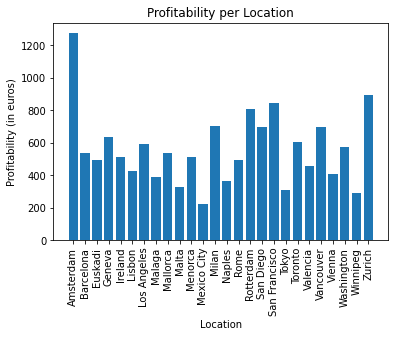

In [132]:
# finally, let's plot the profitability of each location so that we can compare them more easily 

import matplotlib.pyplot as plt

# Plotting the bar plot
plt.bar(profitability_per_location['location'], profitability_per_location['profitability'])

# Adding labels and title
plt.xlabel('Location')
plt.ylabel('Profitability (in euros)')
plt.title('Profitability per Location')

# Rotating x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

Thus, we find that in terms of profitability, the best location for an investor to buy a property in (so as to then rent it via Airbnb) is Amsterdam, with an average profitability of 1274.28 Euros per month and per guest.

# Model Generation

## Linear regression

In [133]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [134]:
X = all_listing_df_8.drop('availability_365', axis=1)
y = all_listing_df_8['availability_365']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12345)

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [136]:
all_listing_df_8.columns

Index(['id', 'property_type', 'room_type', 'accommodates', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_365', 'location', 'Euro_price', 'price_per_guest'],
      dtype='object')

In [137]:
columns_to_drop = ['id', 'price', 'price_per_guest']

# Assuming df is your DataFrame

all_listing_df_9 = all_listing_df_8.drop(columns_to_drop, axis=1)
# Drop rows with NaN values
df_cleaned = all_listing_df_9.dropna()

In [138]:


# One-Hot Encode the Categorical Variables
df_encoded = pd.get_dummies(
    df_cleaned, columns=['property_type', 'room_type', 'location'])

# Split Data into Features (X) and Target (y)
# Assuming 'price' is your target variable
X = df_encoded.drop(['availability_365'], axis=1)
y = df_encoded['availability_365']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

In [139]:
'''
#with label encoded (each column)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming df_cleaned is your cleaned DataFrame

# Initialize LabelEncoders
le_property_type = LabelEncoder()
le_room_type = LabelEncoder()
le_location = LabelEncoder()

# Apply LabelEncoder to each categorical column
df_cleaned['property_type_encoded'] = le_property_type.fit_transform(
    df_cleaned['property_type'])
df_cleaned['room_type_encoded'] = le_room_type.fit_transform(
    df_cleaned['room_type'])
df_cleaned['location_encoded'] = le_location.fit_transform(
    df_cleaned['location'])

# Drop original categorical columns
df_cleaned.drop(['property_type', 'room_type', 'location'],
                axis=1, inplace=True)

# Split Data into Features (X) and Target (y)
# Assuming 'availability_365' is your target variable
X = df_cleaned.drop(['availability_365'], axis=1)
y = df_cleaned['availability_365']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

df_cleaned

'''

"\n#with label encoded (each column)\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import LabelEncoder\n\n# Assuming df_cleaned is your cleaned DataFrame\n\n# Initialize LabelEncoders\nle_property_type = LabelEncoder()\nle_room_type = LabelEncoder()\nle_location = LabelEncoder()\n\n# Apply LabelEncoder to each categorical column\ndf_cleaned['property_type_encoded'] = le_property_type.fit_transform(\n    df_cleaned['property_type'])\ndf_cleaned['room_type_encoded'] = le_room_type.fit_transform(\n    df_cleaned['room_type'])\ndf_cleaned['location_encoded'] = le_location.fit_transform(\n    df_cleaned['location'])\n\n# Drop original categorical columns\ndf_cleaned.drop(['property_type', 'room_type', 'location'],\n                axis=1, inplace=True)\n\n# Split Data into Features (X) and Target (y)\n# Assuming 'availability_365' is your target variable\nX = df_cleaned.drop(['availability_365'], axis=1)\ny = df_cleaned['availability_365']\n\n# Split the 

In [140]:


# Fit the Model on the Training Data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on Test Data
y_pred = model.predict(X_test)

# Calculate Performance Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed

Mean Squared Error: 13163.790682860825
R-squared: 0.26478744494091166


C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed

In [141]:
df_encoded

accommodates  minimum_nights  maximum_nights  availability_30  \
0                2.0               3            28.0              1.0   
1                2.0               1           365.0              0.0   
3                2.0               2          1825.0              4.0   
4                1.0               2           730.0              0.0   
5                4.0               3           730.0              0.0   
...              ...             ...             ...              ...   
342225           2.0               1           365.0              0.0   
342226           3.0               2          1125.0              0.0   
342227           1.0              27          1125.0              0.0   
342231           4.0               6          1125.0              1.0   
342232           6.0               3            90.0              0.0   

        availability_365  Euro_price  property_type_Entire bungalow  \
0                   14.0       49.00                          False   
1                    0.0      106.00                          False   
3                  117.0       75.00                          False   
4                  160.0       55.00                          False   
5                    0.0      240.00                          False   
...                  ...         ...                            ...   
342225               0.0       89.25                          False   
342226               0.0       82.95                          False   
342227               0.0       35.70                          False   
342231               1.0      163.80                          False   
342232               0.0      367.50                          False   

        property_type_Entire condo  property_type_Entire cottage  \
0                            False                         False   
1                            False                         False   
3                            False                         False   
4                            False                         False   
5                            False                         False   
...                            ...                           ...   
342225                       False                         False   
342226                       False                         False   
342227                       False                         False   
342231                       False                         False   
342232                       False                         False   

        property_type_Entire guest suite  ...  location_San Diego  \
0                                  False  ...               False   
1                                  False  ...               False   
3                                  False  ...               False   
4                                  False  ...               False   
5                                  False  ...               False   
...                                  ...  ...                 ...   
342225                             False  ...               False   
342226                             False  ...               False   
342227                             False  ...               False   
342231                             False  ...               False   
342232                             False  ...               False   

        location_San Francisco  location_Tokyo  location_Toronto  \
0                        False           False             False   
1                        False           False             False   
3                        False           False             False   
4                        False           False             False   
5                        False           False             False   
...                        ...             ...               ...   
342225                   False           False             False   
342226                   False           False             False   
342227              

In [142]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# RMSE was already calculated in your code, but here it is again for reference
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 101.57288954658728
Root Mean Squared Error: 114.73356388982617


C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

In [143]:
r2 = r2_score(y_test, y_pred)
r2_percentage = r2 * 100

print(f"R-squared (as a percentage): {r2_percentage:.2f}%")

R-squared (as a percentage): 26.48%


C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


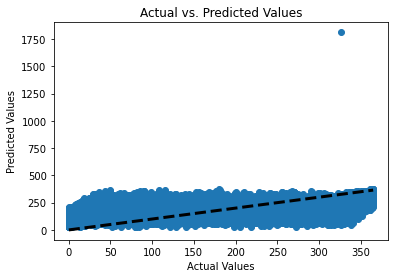

In [144]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'k--', lw=3)  # Line for perfect predictions
plt.show()

## KNN

We will also try to build a model using KNN (k-Nearest Neighbors). As before, we are trying to predict the average profitability of each location so as to find what the most profitable location to buy a property in is. 

In [145]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# SUGGESTION TO IMPROVE MODEL PERFORMANCE : add back bedrooms and amenities







In [146]:
"""

# econdings for property type, room type and location ALREADY DONE DONT NEED

# Use scikit-learn's OneHotEncoder
encoder = OneHotEncoder(sparse=False)

ptype_encoded = encoder.fit_transform(all_listing_df_8[['property_type']])

# Convert to DataFrame for better visualization
ptype_df = pd.DataFrame(ptype_encoded, columns=encoder.get_feature_names(['property_type']))


#for room type 
encoder = OneHotEncoder(sparse=False)

rtype_encoded = encoder.fit_transform(all_listing_df_8[['room_type']])

# Convert to DataFrame with correct number of columns

rtype_df = pd.DataFrame(rtype_encoded, columns=encoder.get_feature_names(['room_type']))


#for location


location_encoded = encoder.fit_transform(all_listing_df_8[['location']])


location_df = pd.DataFrame(location_encoded, columns=encoder.get_feature_names(['location']))

"""

"\n\n# econdings for property type, room type and location ALREADY DONE DONT NEED\n\n# Use scikit-learn's OneHotEncoder\nencoder = OneHotEncoder(sparse=False)\n\nptype_encoded = encoder.fit_transform(all_listing_df_8[['property_type']])\n\n# Convert to DataFrame for better visualization\nptype_df = pd.DataFrame(ptype_encoded, columns=encoder.get_feature_names(['property_type']))\n\n\n#for room type \nencoder = OneHotEncoder(sparse=False)\n\nrtype_encoded = encoder.fit_transform(all_listing_df_8[['room_type']])\n\n# Convert to DataFrame with correct number of columns\n\nrtype_df = pd.DataFrame(rtype_encoded, columns=encoder.get_feature_names(['room_type']))\n\n\n#for location\n\n\nlocation_encoded = encoder.fit_transform(all_listing_df_8[['location']])\n\n\nlocation_df = pd.DataFrame(location_encoded, columns=encoder.get_feature_names(['location']))\n\n"

In [147]:
df_encoded

accommodates  minimum_nights  maximum_nights  availability_30  \
0                2.0               3            28.0              1.0   
1                2.0               1           365.0              0.0   
3                2.0               2          1825.0              4.0   
4                1.0               2           730.0              0.0   
5                4.0               3           730.0              0.0   
...              ...             ...             ...              ...   
342225           2.0               1           365.0              0.0   
342226           3.0               2          1125.0              0.0   
342227           1.0              27          1125.0              0.0   
342231           4.0               6          1125.0              1.0   
342232           6.0               3            90.0              0.0   

        availability_365  Euro_price  property_type_Entire bungalow  \
0                   14.0       49.00                          False   
1                    0.0      106.00                          False   
3                  117.0       75.00                          False   
4                  160.0       55.00                          False   
5                    0.0      240.00                          False   
...                  ...         ...                            ...   
342225               0.0       89.25                          False   
342226               0.0       82.95                          False   
342227               0.0       35.70                          False   
342231               1.0      163.80                          False   
342232               0.0      367.50                          False   

        property_type_Entire condo  property_type_Entire cottage  \
0                            False                         False   
1                            False                         False   
3                            False                         False   
4                            False                         False   
5                            False                         False   
...                            ...                           ...   
342225                       False                         False   
342226                       False                         False   
342227                       False                         False   
342231                       False                         False   
342232                       False                         False   

        property_type_Entire guest suite  ...  location_San Diego  \
0                                  False  ...               False   
1                                  False  ...               False   
3                                  False  ...               False   
4                                  False  ...               False   
5                                  False  ...               False   
...                                  ...  ...                 ...   
342225                             False  ...               False   
342226                             False  ...               False   
342227                             False  ...               False   
342231                             False  ...               False   
342232                             False  ...               False   

        location_San Francisco  location_Tokyo  location_Toronto  \
0                        False           False             False   
1                        False           False             False   
3                        False           False             False   
4                        False           False             False   
5                        False           False             False   
...                        ...             ...               ...   
342225                   False           False             False   
342226                   False           False             False   
342227              

In [148]:
X = df_encoded.drop(['availability_365'], axis=1)
y = df_encoded['availability_365']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [150]:
k = 9  # You can choose the value of k based on cross-validation or other techniques (crossval gave 9)
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\elisa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KNeighborsRegressor(n_neighbors=9)

In [151]:
y_pred = knn_model.predict(X_test_scaled)

KeyboardInterrupt: 

In [ ]:
# evaluations


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 12877.532318163223
R-squared: 0.27769195236593813


In [ ]:
# tuning hyperparameters 

""" 
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f'Best value for k: {best_k}')

"""

" \nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {'n_neighbors': [3, 5, 7, 9]}\ngrid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)\ngrid_search.fit(X_train_scaled, y_train)\n\nbest_k = grid_search.best_params_['n_neighbors']\nprint(f'Best value for k: {best_k}')\n\n"